## Лабораторная работа 2
ИУ5-22М Румак Дарья
## Цель работы 
Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

устранение пропусков в данных;

кодирование категориальных признаков;

нормализация числовых признаков.

## Ход работы

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("uk_universities.csv")
df.head()

,Название университета,Регион,Год основания,Девиз,Национальный ранг,Мировой рейтинг,Оценка мировых рейтингов,Minimum_IELTS_score,Иностранные студенты,Оценка студентов,Кол-во поступивших студентов (тыс.),Кол-во преподавательского состава,Тип управления университета,Местоположение кампуса,Стоимость жизни в год,Широта,Долгота
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,20.20%,85.50%,20,5000.0,Public,Urban,12000,52.2054,0.1132
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,16.80%,86.50%,25,5000.0,Public,Urban,11500,51.7548,-1.2544
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,40.40%,87.90%,10,1500.0,Public,Suburban,12000,56.3417,-2.7943
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,41.40%,77.90%,15,4000.0,Public,Urban,10700,51.4988,-0.1749
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,22.00%,85.80%,15,1500.0,Public,Suburban,9398,52.7650,-1.2321


In [4]:
df.isnull().sum()

Название университета                   0
Регион                                  0
Год основания                           0
Девиз                                  14
Национальный ранг                       0
Мировой рейтинг                         0
Оценка мировых рейтингов               44
Minimum_IELTS_score                     0
Иностранные студенты                    0
Оценка студентов                        0
Кол-во поступивших студентов (тыс.)     0
Кол-во преподавательского состава       0
Тип управления университета             0
Местоположение кампуса                 17
Стоимость жизни в год                   0
Широта                                  0
Долгота                                 0
dtype: int64

Стратегии обработки пропусков:

Для числовых признаков пропуски можно заполнить медианой или средним.

Для категориальных признаков пропуски можно заменить модой.

Если пропусков слишком много, столбец можно удалить.

- Если пропущенных данных слишком много, рекомендуется удалить признак (колонку) целиком.
- Если датасет большой и пропущенных данных относительно немного (5%), рекомендуется удалить строки, содержащие пропуски в данных.

Категориальные признаки: "Девиз", "Местоположение кампуса". 

Количественный признак: "Оценка мировых рейтингов". 

In [7]:
# Колонки с пропусками
hcols_with_na = [c for c in df.columns if df[c].isnull().sum() > 0]
hcols_with_na

['Девиз', 'Оценка мировых рейтингов', 'Местоположение кампуса']

In [8]:
df.shape

(126, 17)

## Заполнение пропусков

In [9]:
# Количество пропусков
[(c, df[c].isnull().sum()) for c in hcols_with_na]

[('Девиз', 14),
 ('Оценка мировых рейтингов', 44),
 ('Местоположение кампуса', 17)]

**Заполнение (внедрение)** значений или **импьютация (imputation)** - это заполнение пропущенных значений их статистическими оценками.

**Для числовых признаков:**

- Заполнение показателями центра распределения.
- Заполнение константой. Полезно в случае "неслучайного" распределения пропусков.
- Заполнение "хвостом распределения".

In [24]:
# Выберем числовые колонки с пропущенными значениями
num_cols = []
total_count = len(df)  # Общее количество записей

# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count > 0 and (dt.startswith('int') or dt.startswith('float') or dt == 'number'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print(f'Колонка {col}. Тип данных {dt}. Количество пустых значений {temp_null_count}, {temp_perc}%.')
        
num_cols

Колонка Оценка мировых рейтингов. Тип данных float64. Количество пустых значений 44, 34.92%.


['Оценка мировых рейтингов']

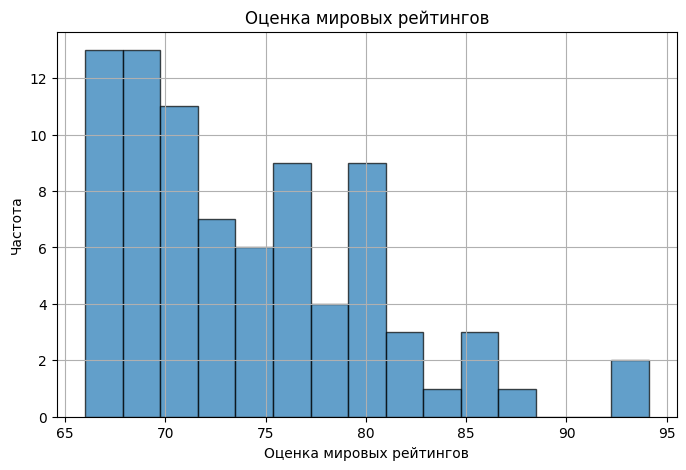

In [27]:
# Выбор столбца
column_name = "Оценка мировых рейтингов"

# Построение гистограммы
plt.figure(figsize=(8, 5))
plt.hist(df[column_name].dropna(), bins=15, edgecolor="black", alpha=0.7)
plt.xlabel(column_name)
plt.ylabel("Частота")
plt.title(f"{column_name}")
plt.grid(True)
plt.show()

In [29]:
# Заполнение пропусков медианой
df['Оценка мировых рейтингов'].fillna(df['Оценка мировых рейтингов'].median(), inplace=True)

In [30]:
df.isnull().sum()

Название университета                   0
Регион                                  0
Год основания                           0
Девиз                                  14
Национальный ранг                       0
Мировой рейтинг                         0
Оценка мировых рейтингов                0
Minimum_IELTS_score                     0
Иностранные студенты                    0
Оценка студентов                        0
Кол-во поступивших студентов (тыс.)     0
Кол-во преподавательского состава       0
Тип управления университета             0
Местоположение кампуса                 17
Стоимость жизни в год                   0
Широта                                  0
Долгота                                 0
dtype: int64

**Для категориальных признаков:**

- Заполнение наиболее распространенным значением категории (аналогом моды).
- Введение отдельного значения категории для пропущенных значений.

Будем работать с признаком "Местоположение кампуса". Проверим уникальные значения.

In [31]:
cat_temp_data = df[['Местоположение кампуса']]
cat_temp_data['Местоположение кампуса'].unique()

array(['Urban', 'Suburban', 'Rural', nan], dtype=object)

Так как мы не можем точно определить местоположение кампуса 
университетов, где стоят пропуски, просто напишем, что данные не указаны. 

Заменим пропуски константой **"NotIndicated"**:

In [49]:
from sklearn.impute import SimpleImputer

column_name = 'Местоположение кампуса'
fill_value = 'NotIndicated' # Ваше значение для заполнения

df[column_name].fillna(fill_value, inplace=True)

In [50]:
np.unique(data_imp)
cat_temp_data['Местоположение кампуса'].unique()

array(['Urban', 'Suburban', 'Rural', nan], dtype=object)

In [51]:
# Заполнение пропусков модой
df['Девиз'].fillna(df['Девиз'].mode()[0], inplace=True)

In [52]:
df.isnull().sum()

Название университета                  0
Регион                                 0
Год основания                          0
Девиз                                  0
Национальный ранг                      0
Мировой рейтинг                        0
Оценка мировых рейтингов               0
Minimum_IELTS_score                    0
Иностранные студенты                   0
Оценка студентов                       0
Кол-во поступивших студентов (тыс.)    0
Кол-во преподавательского состава      0
Тип управления университета            0
Местоположение кампуса                 0
Стоимость жизни в год                  0
Широта                                 0
Долгота                                0
dtype: int64

## Кодирование категориальных признаков

Категориальные признаки нужно преобразовать в числовые для машинного обучения.

Методы кодирования:

- One-Hot Encoding (для номинальных признаков без порядка).

- Ordinal Encoding (для порядковых признаков, например Pclass).

In [54]:
# One-Hot
df = pd.get_dummies(df, columns=['Девиз'], drop_first=True)

## Нормализация числовых признаков


**Методы нормализации**

- StandardScaler (среднее = 0, дисперсия = 1) — для алгоритмов, чувствительных к масштабу (логистическая регрессия, SVM).

- MinMaxScaler (диапазон [0, 1]) — для нейросетей или методов, основанных на расстояниях (KNN).

**MinMaxScaler**: 
Гарантирует, что все значения будут лежать в строго определенном диапазоне (по умолчанию [0, 1]). Это может быть полезно для визуализации или для алгоритмов, которые этого требуют (некоторые нейросетевые слои, обработка изображений, где пиксели часто нормализуют к [0, 1]).

**StandardScaler**: 
Не гарантирует фиксированный диапазон. Значения могут выходить за пределы [-1, 1], особенно если были выбросы.

In [56]:
from sklearn.preprocessing import StandardScaler
        
# Выберем числовые колонки с пропущенными значениями
num_cols = []
total_count = len(df)  # Общее количество записей

# Цикл по колонкам датасета
for col in df.columns:
    # Получаем тип данных колонки
    dt = str(df[col].dtype)
    # Проверяем, начинается ли тип с 'int' или 'float' (основные числовые типы pandas)
    if dt.startswith('int') or dt.startswith('float'):
        num_cols.append(col)
      
num_cols

['Год основания',
 'Национальный ранг',
 'Мировой рейтинг',
 'Оценка мировых рейтингов',
 'Minimum_IELTS_score',
 'Кол-во поступивших студентов (тыс.)',
 'Кол-во преподавательского состава',
 'Стоимость жизни в год',
 'Широта']

In [58]:
# Инициализация и применение StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]

,Год основания,Национальный ранг,Мировой рейтинг,Оценка мировых рейтингов,Minimum_IELTS_score,Кол-во поступивших студентов (тыс.),Кол-во преподавательского состава,Стоимость жизни в год,Широта
0,-5.138159,-1.689938,-0.960007,3.987908,2.460381,0.578467,3.016827,2.141455,-0.354939
1,-5.947320,-1.663876,-0.961818,3.832601,2.460381,1.151476,3.016827,1.820759,-0.628775
2,-3.677371,-1.637813,-0.885719,0.435260,2.460381,-0.567552,0.094807,2.141455,2.158749
3,-0.139975,-1.611750,-0.956383,2.531905,2.460381,0.005457,2.181964,1.307646,-0.784349
4,0.282508,-1.585688,-0.597629,-0.147141,0.858272,0.005457,0.094807,0.472553,-0.014862
...,...,...,...,...,...,...,...,...,...
121,0.468686,1.593962,-0.083958,-0.185968,-0.743836,-0.567552,-0.406111,1.005550,-0.779002
122,0.568936,1.620024,0.196885,-0.185968,-0.743836,-0.567552,-0.740056,0.483457,-0.553965
123,0.576097,1.646087,2.687327,-0.185968,-0.743836,-0.911358,-0.990515,0.483457,-0.447980
124,0.583258,1.672150,1.207919,-0.185968,-0.743836,-1.140562,-0.990515,-0.570992,0.159917


Все числовые признаки будут иметь среднее 0 и стандартное отклонение 1.